## IMPORT DATA

idx/partners is a private high growth organization headquartered in Jakarta and is a leading consulting firm for Data, Analytics & Decisioning solution in Asia-Pacific region. As the final assignment of your contract period as an intern Data Scientist at ID/X Partners, I will be involved in a project for a lending company. I will collaborate with various other departments on this project to provide technological solutions for the company. I am tasked with building a model that can predict credit risk using a dataset provided by the company, consisting of loan data that has been approved and rejected. Additionally, I will need to prepare visual media to present the solution to the client

This project at ID/X Partners aims to build a model that can predict credit risk using a dataset provided by the lending company. The dataset consists of loan data that includes both approved and rejected applications

In [1]:
import warnings
import pandas as pd
import math
import gc
import numpy as np
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.set_option('display.max_rows', 75)
pd.set_option('display.max_columns', 75)

In [2]:
#from google.colab import drive
#drive.mount("/content/gdrive")

In [3]:
df = pd.read_csv('loan_data_2007_2014.csv')
#df = pd.read_csv('/content/gdrive/My Drive/PBI idx partner/loan_data_2007_2014.csv')
df.sample()

C:\Users\xxx\AppData\Local\Temp\ipykernel_15056\4159415716.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
235329,235329,36808274,39561004,35000,35000,35000.0,60 months,11.44,768.69,B,B4,Director of Nursing,7 years,MORTGAGE,93600.0,Verified,Dec-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,106xx,NY,9.54,0.0,Jan-88,1.0,NaN,NaN,12.0,0.0,12938,25.0,30.0,w,29009.63,29009.63,9970.73,9970.73,5990.37,3980.36,0.0,0.0,0.0,Jan-16,768.69,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,160414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51800.0,NaN,NaN,NaN


**Data Information**

- `rec` (Total Amount Committed): The total amount committed by investors for that loan at that point in time.
- `acc_now_delinq` (Number of Delinquent Accounts): The number of accounts on which the borrower is now delinquent.
- `addr_state` (Borrower's State): The state provided by the borrower in the loan application.
- `all_util` (Balance to Credit Limit): Balance to credit limit on all trades.
- `annual_inc` (Annual Income): The self-reported annual income provided by the borrower during registration.
- `annual_inc_joint` (Joint Annual Income): The combined self-reported annual income provided by the co-borrowers during registration.
- `application_type` (Application Type): Indicates whether the loan is an individual application or a joint application with two co-borrowers.
- `collection_recovery_fee` (Recovery Fee): Post-charge-off collection fee.
- `collections_12_mths_ex_med` (Collections in 12 Months): Number of collections in 12 months excluding medical collections.
- `delinq_2yrs` (Delinquencies in Past 2 Years): The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
- `desc` (Loan Description): Loan description provided by the borrower.
- `dti_joint` (Joint Debt-to-Income Ratio): A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income.
- `earliest_cr_line` (Earliest Credit Line): The month the borrower's earliest reported credit line was opened.
- `emp_length` (Employment Length): Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- `emp_title` (Employment Title): The job title supplied by the borrower when applying for the loan.
- `Femp` (Debt-to-Income Ratio): A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- `fico_range_high` (FICO Range High): The upper boundary range the borrower’s FICO at loan origination belongs to.
- `fico_range_low` (FICO Range Low): The lower boundary range the borrower’s FICO at loan origination belongs to.
- `funded_amnt` (Funded Amount): The total amount committed to that loan at that point in time.
- `grade` (Loan Grade): LC assigned loan grade.
- `home_ownership` (Home Ownership Status): The home ownership status provided by the borrower during registration. Our values are RENT, OWN, MORTGAGE, OTHER.
- `id` (Loan ID): A unique LC assigned ID for the loan listing.
- `il_util` (Installment Account Utilization): Ratio of total current balance to high credit/credit limit on all installment accounts.
- `initial_list_status` (Initial Listing Status): The initial listing status of the loan. Possible values are – Whole, Fractional.
- `inq_fi` (Personal Finance Inquiries): Number of personal finance inquiries.
- `inq_last_12m` (Inquiries in Past 12 Months): Number of credit inquiries in the past 12 months.
- `inq_last_6mths` (Inquiries in Past 6 Months): The number of inquiries in the past 6 months (excluding auto and mortgage inquiries).
- `installment` (Monthly Payment): The monthly payment owed by the borrower if the loan originates.
- `int_rate` (Interest Rate): Indicates if income was verified by LC, not verified, or if the income source was verified.
- `is_inc_v` (Income Verification): Indicates if income was verified.
- `issue_d` (Issue Date): The month in which the loan was funded.
- `last_fico_range_high` (Last FICO Range High): The upper boundary range the borrower’s last FICO pulled belongs to.
- `last_fico_range_low` (Last FICO Range Low): The lower boundary range the borrower’s last FICO pulled belongs to.
- `last_pymnt_amnt` (Last Payment Amount): Last total payment amount received.
- `last_pymnt_d` (Last Payment Date): Last month payment was received.
- `loan_amnt` (Loan Amount): The total amount funded for the loan.
- `loan_status` (Loan Status): Current status of the loan.
- `max_bal_bc` (Maximum Balance Owed): Maximum current balance owed on all revolving accounts.
- `member_id` (Borrower Member ID): A unique LC assigned ID for the borrower member.
- `mths_since_last_delinq` (Months Since Last Delinquency): The number of months since the borrower's last delinquency.
- `mths_since_last_major_derog` (Months Since Last Major Derogatory): Months since the most recent 90-day or worse rating.
- `mths_since_last_record` (Months Since Last Public Record): The number of months since the last public record.
- `mths_since_rcnt_il` (Months Since Most Recent Installment Account): Months since the most recent installment accounts were opened.
- `next_pymnt_d` (Next Payment Date): Next scheduled payment date.
- `open_acc` (Open Credit Lines): The number of open credit lines in the borrower's credit file.
- `open_acc_6m` (Open Trades in Last 6 Months): Number of open trades in the last 6 months.
- `open_il_12m` (Installment Accounts Opened in Last 12 Months): Number of installment accounts opened in the past 12 months.
- `open_il_24m` (Installment Accounts Opened in Last 24 Months): Number of installment accounts opened in the past 24 months.
- `open_il_6m` (Installment Accounts Opened in Last 6 Months): Number of installment accounts opened in the past 6 months.
- `open_rv_12m` (Revolving Trades Opened in Last 12 Months): Number of revolving trades opened in the past 12 months.
- `open_rv_24m` (Revolving Trades Opened in Last 24 Months): Number of revolving trades opened in the past 24 months.
- `out_prncp` (Outstanding Principal): Remaining outstanding principal for the total amount funded.
- `out_prncp_inv` (Outstanding Principal Invested): Remaining outstanding principal for the portion of the total amount funded by investors.
- `policy_code` (Policy Code): Publicly available policy code values are 1 for new products and 2 for products not publicly available.
- `pub_rec` (Derogatory Public Records): Number of derogatory public records.
- `purpose` (Loan Purpose): A category provided by the borrower for the loan request.
- `recoveries` (Recoveries): Indicates if a payment plan has been put in place for the loan.
- `revol_bal` (Revolving Balance): Total credit revolving balance.

# Data Exploration

In [4]:
print("Number of Rows :",df.shape[0])
print("Number of Columns :",df.shape[1])

Number of Rows : 466285
Number of Columns : 75


In [5]:
# check duplicated data
df.duplicated().sum()

0

In [6]:
list_item = []
for col in df.columns :
    list_item.append([
        col, df[col].dtype,
        df[col].isna().sum(),
        df[col].nunique(),
        df[col].unique()
    ])
columns = ['Columns name', 'Data Type', 'Data null', 'Data Different', 'Data Sample']
deskripsi_df = pd.DataFrame(data=list_item, columns=columns)
deskripsi_df

,Columns name,Data Type,Data null,Data Different,Data Sample
0,Unnamed: 0,int64,0,466285,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,int64,0,466285,"[1077501, 1077430, 1077175, 1076863, 1075358, ..."
2,member_id,int64,0,466285,"[1296599, 1314167, 1313524, 1277178, 1311748, ..."
3,loan_amnt,int64,0,1352,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
4,funded_amnt,int64,0,1354,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
5,funded_amnt_inv,float64,0,9854,"[4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000..."
6,term,object,0,2,"[ 36 months, 60 months]"
7,int_rate,float64,0,506,"[10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64..."
8,installment,float64,0,55622,"[162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ..."
9,grade,object,0,7,"[B, C, A, E, F, D, G]"


**Data Information**
- Columns `mths_since_last_major_derog`, `mths_since_last_record`, `mths_since_last_delinq`, and `next_pymnt_d` have a significant number of missing values.
- Columns `emp_title` and `desc` contain free-text data.
- Columns `title`, `zip_code`, `sub_grade`, and `addr_state` exhibit high cardinality with a large number of unique values.
- Columns `emp_length` can be impute with **unemployee**
- Columns `total_rev_hi_lim`, `tot_cur_bal`, `tot_coll_amt`, `acc_now_delinq`, `collections_12_mths_ex_med`, `total_acc`, `revol_util`, `pub_rec`, `open_acc`, `inq_last_6mths`, `delinq_2yrs`, `annual_inc` can be impute with the mean value

In this dataset, there are 75 columns, and many of them have invalid values. Therefore, it is necessary to perform feature selection first to make data processing and visualization less computationally intensive.

Flow:
- Data Exploration
- Feature Selection
- Define Target
- Exploratory Data Analysis
- Data Preprocessing
- Feature Encoding
- Modelling
- Evaluation
- Visualization

# Feature Selection

In [7]:
# Remove columns that have entirely empty data values
remove_columns = df.columns[df.isnull().sum() == df.shape[0]]
df.drop(columns=remove_columns, inplace =True)


In [8]:
# Remove identity columns where all variables are different
remove_columns = df.columns[df.apply(lambda x: x.nunique()) == df.shape[0]]
df.drop(columns=remove_columns, inplace=True)

In [9]:
# Remove columns that have only one data variable
remove_columns = df.columns[df.apply(lambda x: x.nunique()) == 1]
df.drop(columns=remove_columns, inplace=True)

In [10]:
# Remove columns with many missing data values
df.drop(columns='mths_since_last_major_derog', inplace=True)
df.drop(columns='mths_since_last_record', inplace=True)
df.drop(columns='mths_since_last_delinq', inplace=True)
df.drop(columns='next_pymnt_d', inplace=True)

In [11]:
# Remove columns containing free-text data
df.drop(columns='emp_title', inplace=True)
df.drop(columns='desc', inplace=True)

In [12]:
# Remove categorical columns with high cardinality (too many unique values)
df.drop(columns='title', inplace=True)
df.drop(columns='zip_code', inplace=True)
df.drop(columns='sub_grade', inplace=True)
df.drop(columns='addr_state', inplace=True)

In [13]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

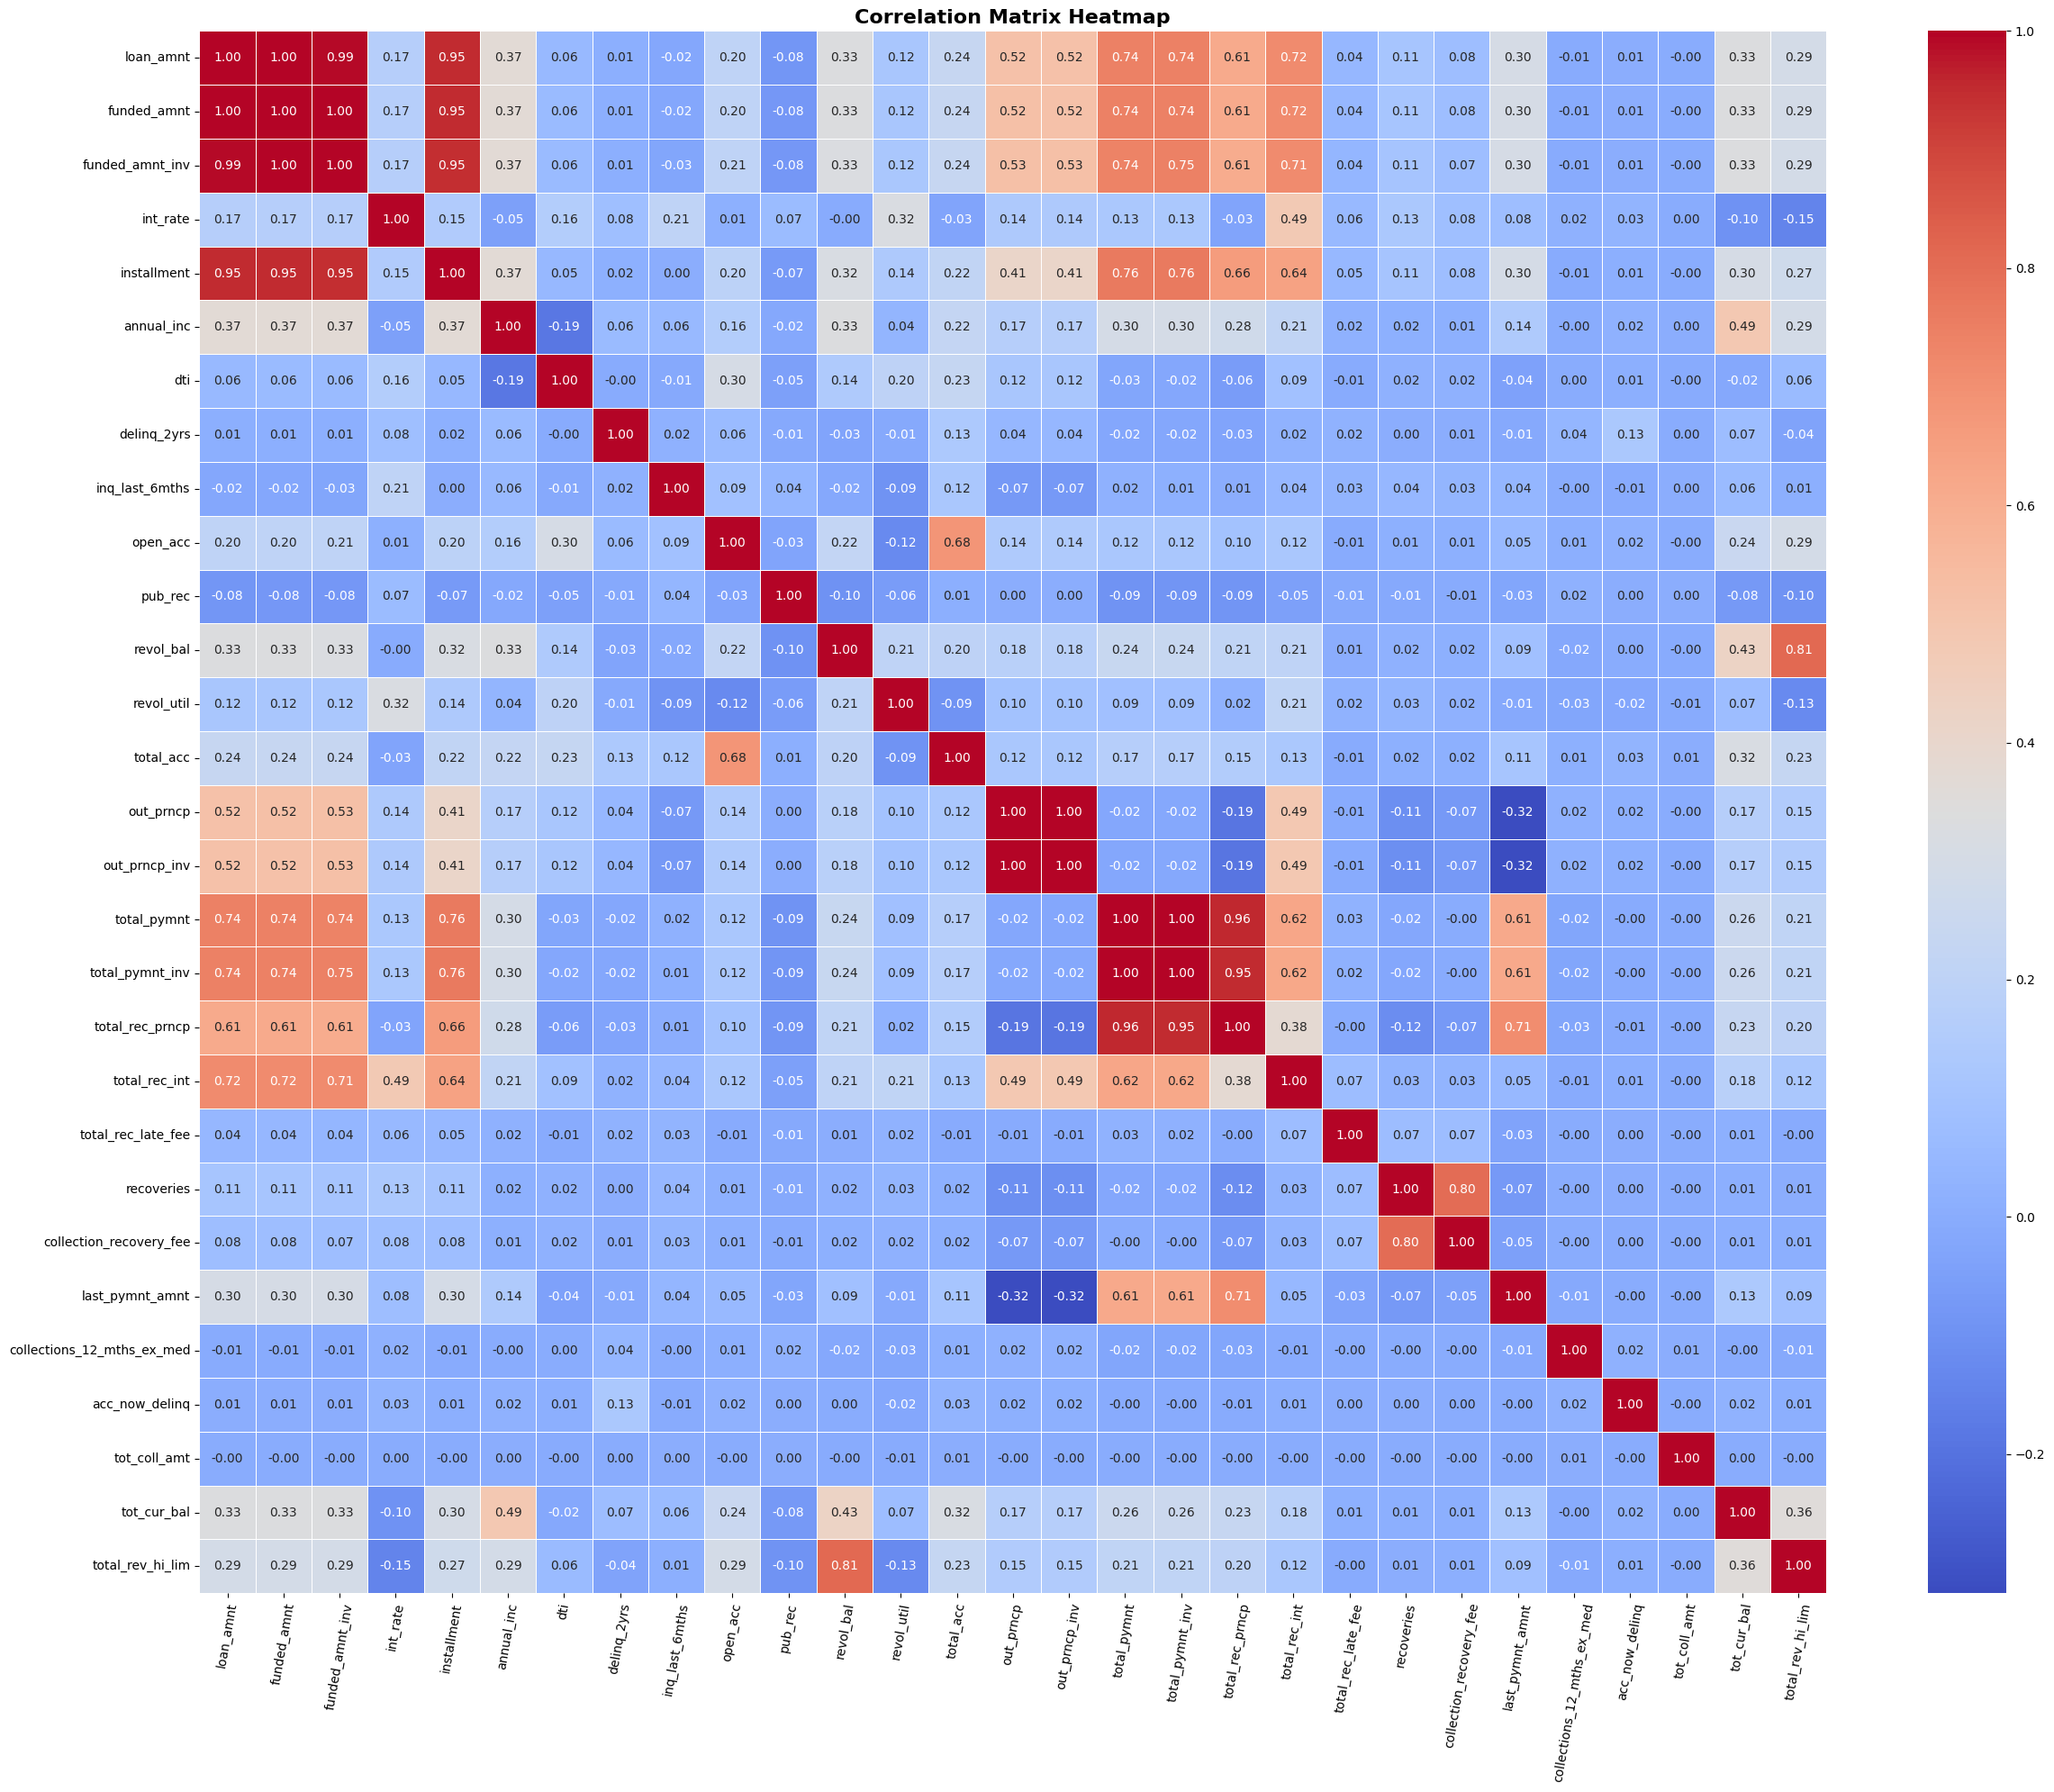

In [15]:
# Visualization to observe the correlation between columns
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
# Remove columns that have high correlation with each other
df.drop(columns=[ 'funded_amnt', 'funded_amnt_inv','total_pymnt_inv','total_rec_prncp','out_prncp_inv',], inplace=True)

# Define Target


In this dataset, the variable `loan_status` is a suitable target variable as it reflects the performance of each individual in making loan/credit payments over time.

In [17]:
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

It can be observed that the variable `loan_status` has several values:

- `Current`, which means payments are up-to-date
- `Charged Off`, which signifies defaulted payments that have been written off
- `Late`, indicating delayed payments; In Grace Period, indicating a grace period
- `Fully Paid`, meaning payments have been completed
- `Default`, which denotes defaulted payments

In [18]:
credit_risk = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']
df['credit_risk'] = np.where(df['loan_status'].isin(credit_risk), 1, 0)

In [19]:
df.sample()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_risk
424833,25000,36 months,11.99,830.24,B,10+ years,MORTGAGE,62000.0,Source Verified,Mar-14,Fully Paid,n,debt_consolidation,11.96,0.0,Mar-95,0.0,10.0,0.0,25960,67.1,13.0,w,0.0,28918.56,3918.56,0.0,0.0,0.0,Nov-15,13144.0,Jan-16,0.0,0.0,0.0,147990.0,38700.0,0


In [20]:
df.drop('loan_status', axis=1, inplace=True)

In [21]:
value_counts = df['credit_risk'].value_counts()
normalized_counts = df['credit_risk'].value_counts(normalize=True) * 100

table_credit = pd.DataFrame({'Counts': value_counts, 'Percentage (%)': normalized_counts.round(2)})
table_credit

,Counts,Percentage (%)
0,415317,89.07
1,50968,10.93


<AxesSubplot: xlabel='credit_risk', ylabel='count'>

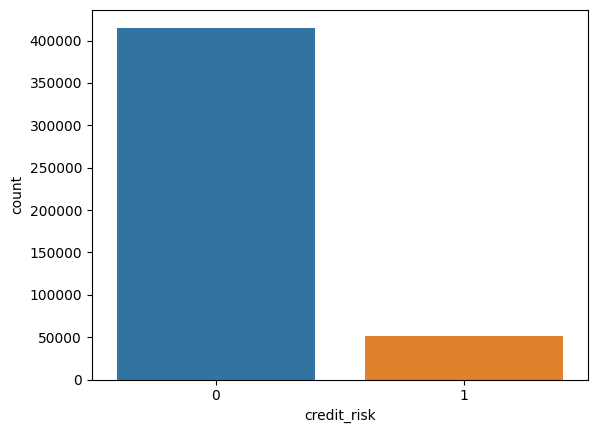

In [22]:
sns.countplot(data=df, x='credit_risk')

In the data above, there are `10% of individuals` with a poor credit risk status. While the percentage may appear small, it is worth noting that within the dataset, there are a total of `50,968 individual`s who have experienced loan defaults. In the field of credit risk scoring, this represents a considerably high figure

## Data Imputation

In [23]:
# Convert the data format to datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')

In [24]:
# Impute categorical columns by adding a new category variable
df['emp_length'].fillna('Unemployee', inplace=True)

In [25]:
# Impute numerical columns with the mean value
df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].mean(), inplace=True)
df['tot_cur_bal'].fillna(df['tot_cur_bal'].mean(), inplace=True)
df['tot_coll_amt'].fillna(df['tot_coll_amt'].mean(), inplace=True)
df['acc_now_delinq'].fillna(df['acc_now_delinq'].mean(), inplace=True)
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].mean(), inplace=True)
df['total_acc'].fillna(df['total_acc'].mean(), inplace=True)
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)
df['pub_rec'].fillna(df['pub_rec'].mean(), inplace=True)
df['open_acc'].fillna(df['open_acc'].mean(), inplace=True)
df['inq_last_6mths'].fillna(df['inq_last_6mths'].mean(), inplace=True)
df['delinq_2yrs'].fillna(df['delinq_2yrs'].mean(), inplace=True)
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)

# Exploratory Data Analysis

In [26]:
# Separate categorical and numerical columns
cats=[i for i in df.columns if df[i].dtypes == 'object']
nums=[i for i in df.columns if df[i].dtypes in ['float64', 'int64']]

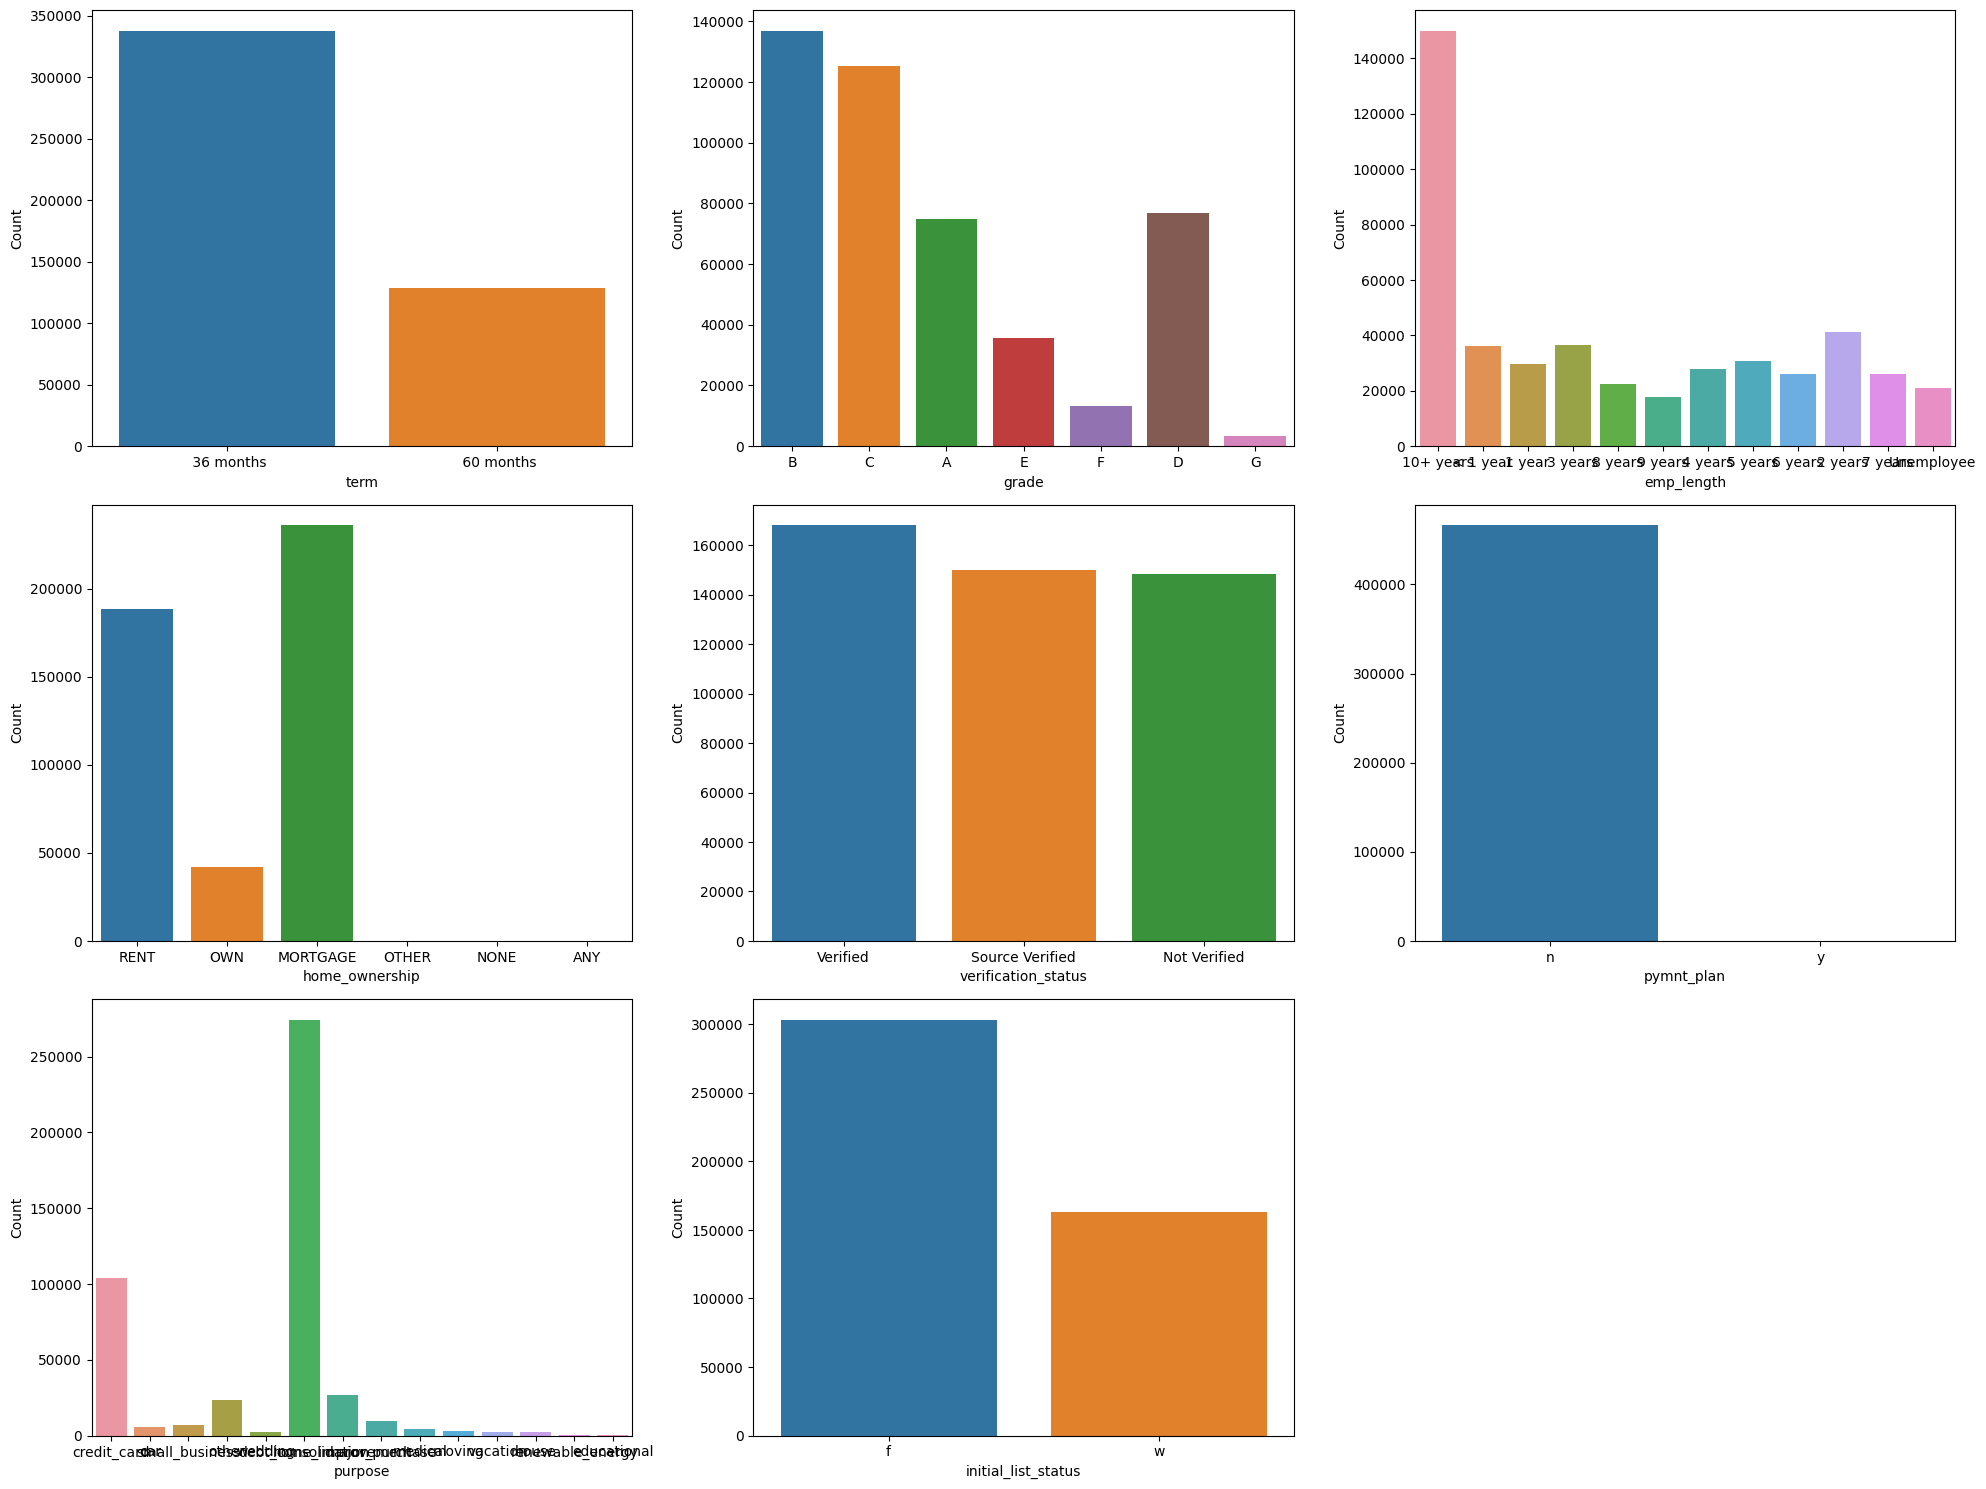

In [27]:
# Univariate analysis for categorical columns
num_cat_cols = len(cats)
num_rows = (num_cat_cols - 1) // 3 + 1
plt.figure(figsize=(20, 5*num_rows))
for i, col in enumerate(cats):
    plt.subplot(num_rows, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

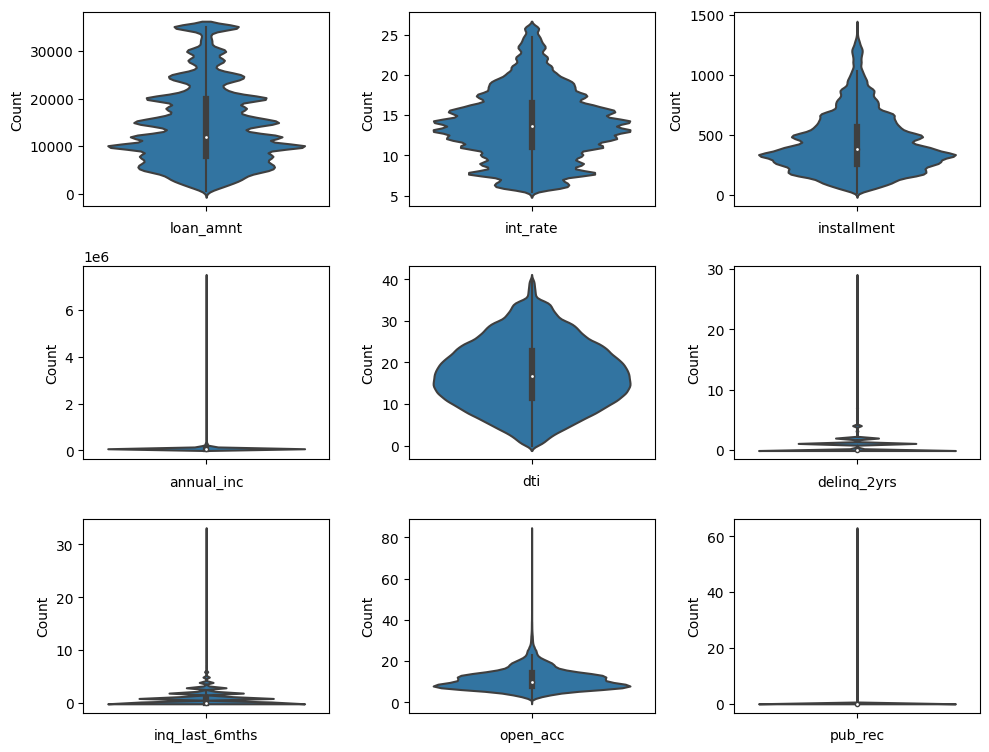

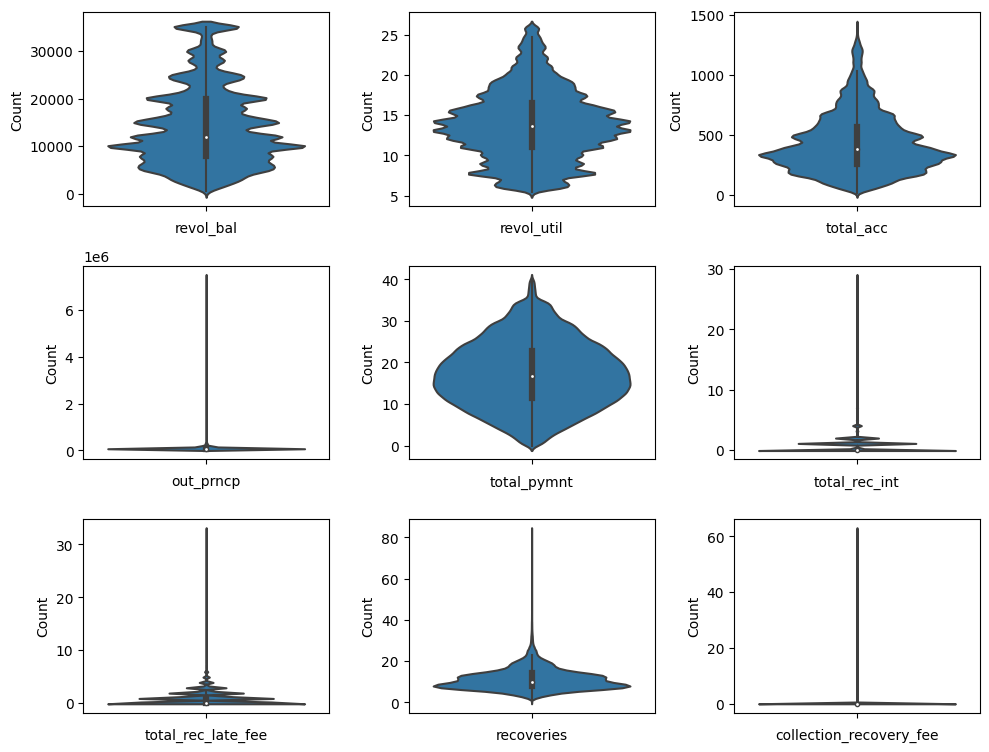

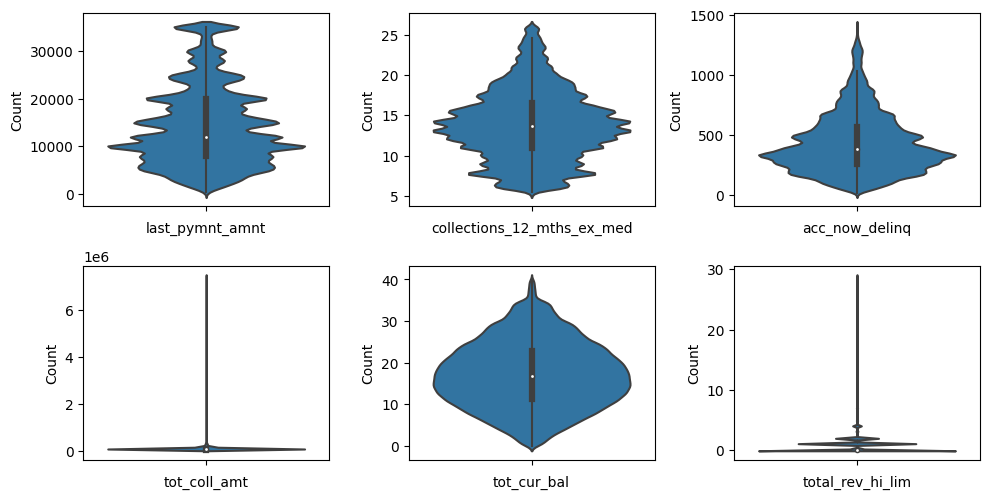

In [28]:
num_cols_count = len(nums)
num_rows = math.ceil(num_cols_count / 3)
num_figures = math.ceil(num_cols_count / 9)

for f in range(num_figures):
    start_idx = f * 9
    end_idx = min(start_idx + 9, num_cols_count)
    plt.figure(figsize=(10, 20))
    for i, col in enumerate(nums[start_idx:end_idx]):
        plt.subplot(num_rows, 3, i+1)
        sns.violinplot(y=df[nums[i]], orient='v')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Handling Outlier


In [29]:
# handle outlier using z-score
from scipy import stats
df_copy = df.copy()
print(f'The number of rows before filtering outliers is {df_copy.shape[0]}')

# handle outlier using z-score
filtered_entries = np.array([True] * len(df_copy))
skewed_cols = ['annual_inc',
               'delinq_2yrs',
               'pub_rec',
               'inq_last_6mths',
               'out_prncp',
               'total_rec_int',
               'total_rec_late_fee',
               'collection_recovery_fee',
               'tot_coll_amt',
               'total_rev_hi_lim',
               'recoveries',
               'open_acc']
for col in skewed_cols:
    zscore = abs(stats.zscore(df_copy[col]))
    filtered_entries = (zscore < 3) & filtered_entries

# view total rows after filtered
df = df_copy[filtered_entries]
print(f'The number of rows after filtering outliers is {df.shape[0]}')

The number of rows before filtering outliers is 466285
The number of rows after filtering outliers is 403567


# Feature Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV

### Label Encoding

In [31]:
# Label Encoding
label_var = ['term', 'grade', 'verification_status', 'home_ownership', 'emp_length']
labelencoder = LabelEncoder()

for i in label_var:
    df[i] = labelencoder.fit_transform(df[i])

df.head()

C:\Users\xxx\AppData\Local\Temp\ipykernel_15056\3477354573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = labelencoder.fit_transform(df[i])
C:\Users\xxx\AppData\Local\Temp\ipykernel_15056\3477354573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = labelencoder.fit_transform(df[i])
C:\Users\xxx\AppData\Local\Temp\ipykernel_15056\3477354573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_risk
0,5000,0,10.65,162.87,1,1,5,24000.0,2,2011-12-01,n,credit_card,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648,83.7,9.0,f,0.00,5861.071414,861.07,0.0,0.0,0.0,2015-01-01,171.62,2016-01-01,0.0,0.0,191.913517,138801.713385,30379.087771,0
2,2400,0,15.96,84.33,2,1,5,12252.0,0,2011-12-01,n,small_business,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.00,3003.653644,603.65,0.0,0.0,0.0,2014-06-01,649.91,2016-01-01,0.0,0.0,191.913517,138801.713385,30379.087771,0
4,3000,1,12.69,67.79,1,0,5,80000.0,1,2011-12-01,n,other,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783,53.9,38.0,f,766.90,3242.170000,1009.07,0.0,0.0,0.0,2016-01-01,67.79,2016-01-01,0.0,0.0,191.913517,138801.713385,30379.087771,0
5,5000,0,7.90,156.46,0,3,5,36000.0,1,2011-12-01,n,wedding,11.20,0.0,2004-11-01,3.0,9.0,0.0,7963,28.3,12.0,f,0.00,5631.377753,631.38,0.0,0.0,0.0,2015-01-01,161.03,2015-09-01,0.0,0.0,191.913517,138801.713385,30379.087771,0
6,7000,1,15.96,170.08,2,8,5,47004.0,0,2011-12-01,n,debt_consolidation,23.51,0.0,2005-07-01,1.0,7.0,0.0,17726,85.6,11.0,f,1889.15,8136.840000,3025.99,0.0,0.0,0.0,2016-01-01,170.08,2016-01-01,0.0,0.0,191.913517,138801.713385,30379.087771,0


### One Hot Encoding

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Creating instance of OneHotEncoder
encoder = OneHotEncoder()

# Define the columns to be one-hot encoded
columns_to_encode = ['pymnt_plan', 'initial_list_status', 'purpose']

# Create the ColumnTransformer
ct = ColumnTransformer([('encoder', encoder, columns_to_encode)], remainder='passthrough')

# Apply one-hot encoding to the selected columns
encoded_data = ct.fit_transform(df)

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data)

# Update column names for one-hot encoded columns
encoded_columns = ct.named_transformers_['encoder'].get_feature_names_out(columns_to_encode)
new_columns = list(encoded_columns) + list(df.columns.drop(columns_to_encode))
encoded_df.columns = new_columns

# Update df_copy with the encoded DataFrame
df = encoded_df

# Display the resulting dataset
df.head()

,pymnt_plan_n,pymnt_plan_y,initial_list_status_f,initial_list_status_w,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_risk
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000,0,10.65,162.87,1,1,5,24000.0,2,2011-12-01,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648,83.7,9.0,0.0,5861.071414,861.07,0.0,0.0,0.0,2015-01-01,171.62,2016-01-01,0.0,0.0,191.913517,138801.713385,30379.087771,0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2400,0,15.96,84.33,2,1,5,12252.0,0,2011-12-01,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956,98.5,10.0,0.0,3003.653644,603.65,0.0,0.0,0.0,2014-06-01,649.91,2016-01-01,0.0,0.0,191.913517,138801.713385,30379.087771,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3000,1,12.69,67.79,1,0,5,80000.0,1,2011-12-01,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783,53.9,38.0,766.9,3242.17,1009.07,0.0,0.0,0.0,2016-01-01,67.79,2016-01-01,0.0,0.0,191.913517,138801.713385,30379.087771,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5000,0,7.9,156.46,0,3,5,36000.0,1,2011-12-01,11.2,0.0,2004-11-01,3.0,9.0,0.0,7963,28.3,12.0,0.0,5631.377753,631.38,0.0,0.0,0.0,2015-01-01,161.03,2015-09-01,0.0,0.0,191.913517,138801.713385,30379.087771,0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000,1,15.96,170.08,2,8,5,47004.0,0,2011-12-01,23.51,0.0,2005-07-01,1.0,7.0,0.0,17726,85.6,11.0,1889.15,8136.84,3025.99,0.0,0.0,0.0,2016-01-01,170.08,2016-01-01,0.0,0.0,191.913517,138801.713385,30379.087771,0


In [33]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype(float)

In [34]:
X = df.drop(['credit_risk','earliest_cr_line', 'last_credit_pull_d', 'issue_d', 'last_pymnt_d'], axis=1, inplace=False)
y = df['credit_risk']

# Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [36]:
# check the shape of X_train and X_test

print(f'The number of training data consists of {len(X_train)} baris')
print(f'The number of test data consists of {len(X_test)} baris')

The number of training data consists of 322853 baris
The number of test data consists of 80714 baris


# Modelling

In [37]:
# import library untuk modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [38]:
# Model assignment
xgb = XGBClassifier(eval_metric='error')
dtc = DecisionTreeClassifier()
logreg = LogisticRegression()
nb = GaussianNB()

# Assign model to a list
models = [xgb, dtc, logreg, nb]
model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

# Fit and Evaluation

In [39]:
# Create a list to assign a model score
train_score = []
test_score = []

# Create dataframe
df_train_test = pd.DataFrame()
for i in models:
    # Fit each model
    model = i.fit(X_train, y_train)
    # accuracy for training set
    train_score.append(model.score(X_train, y_train))
    # accuracy for testing set
    test_score.append(model.score(X_test, y_test))

At this stage, we conduct training on the entire dataset using cross-validation. This is done to predict the outcome of the best model that will be utilized

In [40]:
# Cross validation for each model 
xgb_score = cross_val_score(models[0], X, y, scoring='recall', cv=5, n_jobs=-1, verbose=1)
dct_score = cross_val_score(models[1], X, y, scoring='recall', cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(models[2], X, y, scoring='recall', cv=5, n_jobs=-1, verbose=1)
nb_score = cross_val_score(models[3], X, y, scoring='recall', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.3s finished


In [41]:
# List of score per model
cv_result = [xgb_score, dct_score, logreg_score, nb_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

,0,1,2,3,4
XGBClassifier,0.911892,0.875523,0.917887,0.682838,0.743064
DecisionTreeClassifier,0.922766,0.872595,0.918444,0.686184,0.756308
LogisticRegression,0.878572,0.851547,0.808867,0.655235,0.732190
GaussianNB,0.526976,0.357820,0.585808,0.161299,0.170361


The indices from 0 to 4 above represent the number of trials conducted. In this case, we use k-fold with k = 5, meaning we perform 5 trials to test the dataset. This is done to predict the performance of the best model to be used. From the results, it can be seen that the `Decision Tree` consistently has the highest performance in each trial, increasing the likelihood of using the Decision Tree Classifier. However, the results of the 5 trials above will be computed based on the average performance of each model, and the best-performing model will be used in the end.

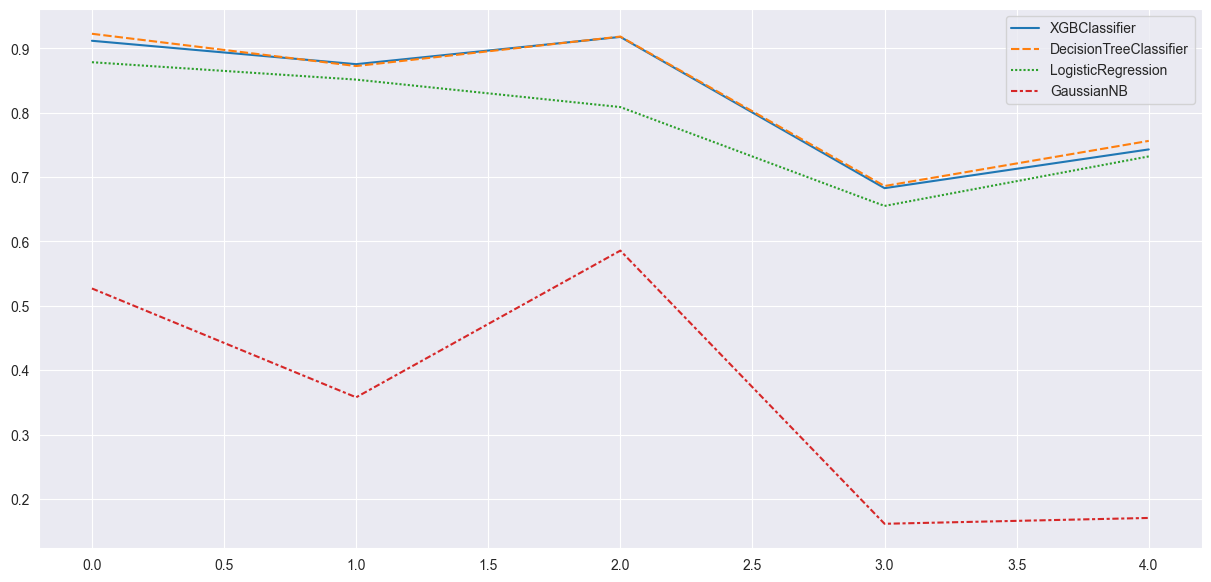

In [42]:
# Plot cross validation score
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
sns.lineplot(data=df_cv_result.T)
plt.show()

In [43]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1

In [44]:
# Calculate standard deviation for every k-fold validation
cv_std = []
i = 0 
for std in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1

In this case, the `Decision Tree` model exhibits the highest average recall value among all other models, signifying its superior performance in correctly identifying loan defaults.

In [45]:
# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':train_score,
    'test score':test_score},
    index=model_name)

# Create a new column for the difference in accuracy score 
df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['train score', 'test score','difference'], ascending=[False, False, True])
df_avg_score

,train score,test score,difference
DecisionTreeClassifier,1.000000,0.971839,0.028161
XGBClassifier,0.987830,0.986669,0.001161
LogisticRegression,0.979127,0.980165,0.001038
GaussianNB,0.943132,0.943678,0.000546


Cross Validation

In [46]:
# Fit classifier
dtc.fit(X_train, y_train)

# predict test set
y_pred = dtc.predict(X_test)
y_pred_proba = dtc.predict_proba(X_test)
y_pred_proba_train = dtc.predict_proba(X_train)

# Calculate accuracy, precision, recall, and f1-score
train_score = round((nb.score(X_train, y_train) * 100), 2)
test_score = round((nb.score(X_test, y_test) * 100), 2)
prec_score = round((precision_score(y_test, y_pred)) * 100, 2)
recall_score = round((recall_score(y_test, y_pred)) * 100, 2)
f1 = round(f1_score(y_test, y_pred)*100, 2)
train_roc_auc = round((roc_auc_score(y_train, y_pred_proba_train[:, 1]) * 100), 2)
test_roc_auc = round((roc_auc_score(y_test, y_pred_proba[:, 1]) * 100), 2)

print('Training Accuracy : {}%'.format(train_score))
print('Test Accuracy : {}%'.format(test_score))
print('Precision Score : {}%'.format(prec_score))
print('Recall Score : {}%'.format(recall_score))
print('F1 Score : {}%'.format(f1))
print('roc_auc (train-proba) : {}%'.format(train_roc_auc))
print('roc_auc (test-proba) : {}%'.format(test_roc_auc))

Training Accuracy : 94.31%
Test Accuracy : 94.37%
Precision Score : 83.11%
Recall Score : 86.11%
F1 Score : 84.59%
roc_auc (train-proba) : 100.0%
roc_auc (test-proba) : 92.2%


In [47]:
pd.DataFrame({
    'train_acc':[train_score],
    'test_acc':[test_score],
    'precision':[prec_score],
    'recall':[recall_score],
    'f1-score':[f1],
    'roc_auc (train-proba)':[train_roc_auc],
    'roc_auc (test-proba)':[test_roc_auc]}, index=['Default Decision Tree Classifier'])

,train_acc,test_acc,precision,recall,f1-score,roc_auc (train-proba),roc_auc (test-proba)
Default Decision Tree Classifier,94.31,94.37,83.11,86.11,84.59,100.0,92.2


In [48]:

# Define the parameter grid you want to search
params = {
    'criterion': ['gini', 'entropy'],  # Adjust criterion
    'max_depth': [None, 10, 20, 30, 40, 50],  # Adjust max_depth
    'min_samples_split': [2, 5, 10],  # Adjust min_samples_split
    'min_samples_leaf': [1, 2, 4]  # Adjust min_samples_leaf
}

# Create an instance of RandomizedSearchCV for DecisionTreeClassifier
dtc_tuned = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=params,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    n_iter=10
)

# Perform the parameter search
dtc_tuned.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='recall')

In [49]:
dtc_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='recall')

In [50]:
# best estimator for xgboost
dtc_tuned.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [51]:
# Predict test set
y_pred_tuned = dtc_tuned.predict(X_test)
y_pred_proba_tuned = dtc.predict_proba(X_test)
y_pred_proba_train_tuned = dtc.predict_proba(X_train)

# Confusion Matrix

In [52]:
from sklearn.metrics import classification_report

# Classification report model tuned
cr_tuned = classification_report(y_test, y_pred_tuned, target_names=['train', 'test'])

# Classification report model tanpa tuning
cr_default = classification_report(y_test, y_pred, target_names=['train', 'test'])

# Gabungkan kedua laporan
combined_report = f"Classification Report Model Default:\n{cr_default}\n\nClassification Report Model Hyperparameter Tuning:\n{cr_tuned}"

print(combined_report)


Classification Report Model Default:
              precision    recall  f1-score   support

       train       0.99      0.98      0.98     73541
        test       0.83      0.86      0.85      7173

    accuracy                           0.97     80714
   macro avg       0.91      0.92      0.92     80714
weighted avg       0.97      0.97      0.97     80714


Classification Report Model Hyperparameter Tuning:
              precision    recall  f1-score   support

       train       0.99      0.99      0.99     73541
        test       0.85      0.86      0.86      7173

    accuracy                           0.97     80714
   macro avg       0.92      0.92      0.92     80714
weighted avg       0.97      0.97      0.97     80714



In the Classification Report results, it can be observed that after applying hyperparameter tuning, some of the performance metrics have improved, although not significantly.

[[72459  1082]
 [  987  6186]]


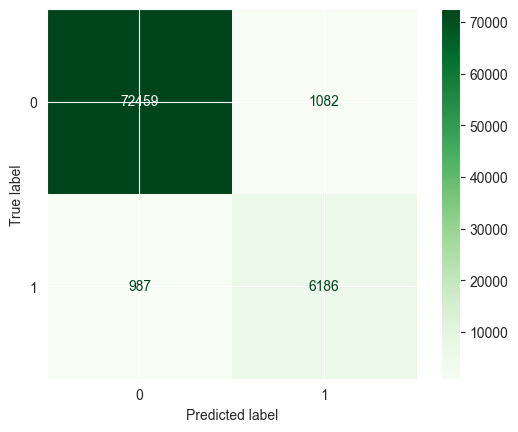

In [53]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
print(cm)
ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(cmap='Greens')
plt.show()

In this modeling outcome, there are `986 customers` classified as false positives with a loan default status. This result represents an improvement when compared to the pre-modeling data, which had `51,968 customers` identified as such.

In [55]:
feature_importance = pd.DataFrame({
    'Features':X.columns,
    'Importance':xgb.feature_importances_}).sort_values('Importance', ascending=False)

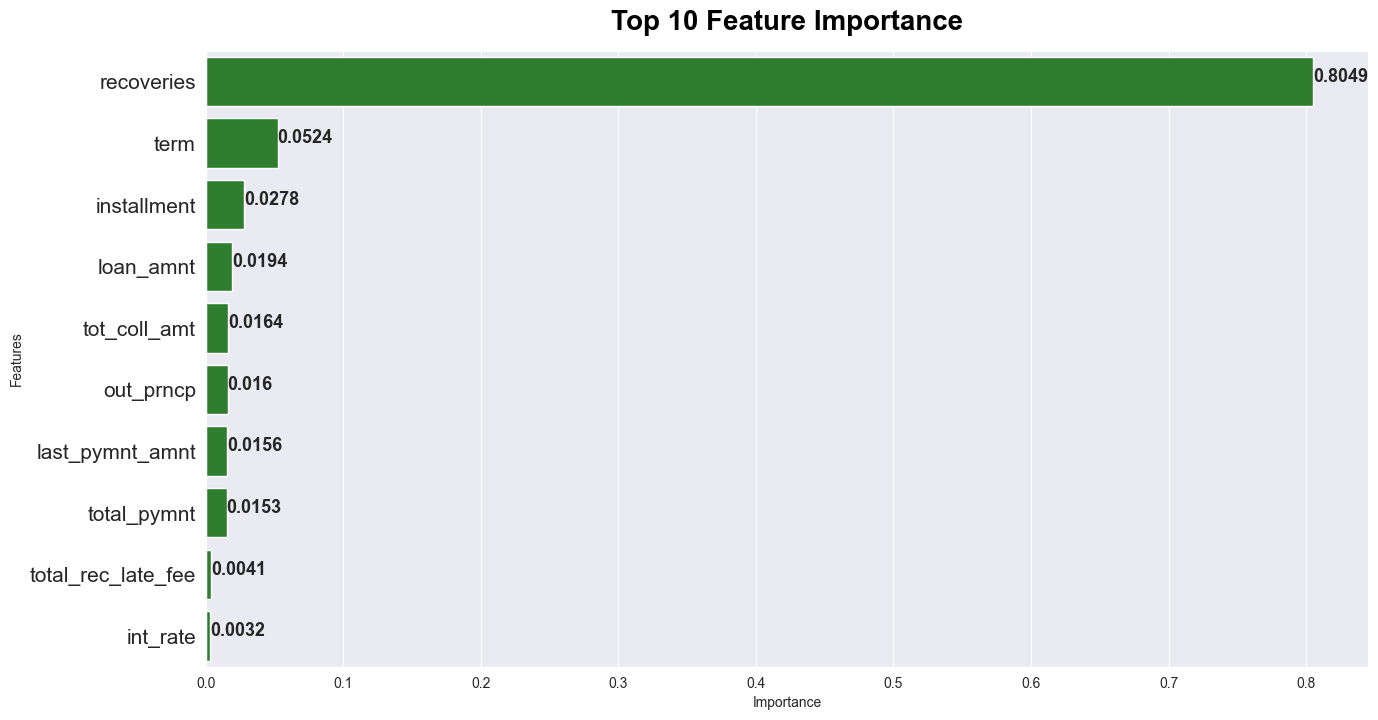

In [56]:
# Mengambil 10 fitur teratas
top_10_features = feature_importance.nlargest(10, 'Importance')

# Plot bar untuk 10 fitur teratas
plt.figure(figsize=(15, 8))
sns.barplot(data=top_10_features, x='Importance', y='Features', color='Forestgreen')

# Fungsi untuk menambahkan label nilai
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(x[i], i, round(x[i], 4), fontsize=13, fontweight='bold')

x = list(top_10_features['Importance'])
y = list(top_10_features['Features'])

plt.title('Top 10 Feature Importance', fontsize=20, color='black', pad=15, fontweight='bold')
plt.yticks(fontsize=15)
addlabels(x, y)
plt.show()


The columns that significantly influence credit risk scoring are `recoveries` (Indicates if a payment plan has been put in place for the loan), `installment` (The monthly payment owed by the borrower if the loan originates), and `total payment` (Last total payment amount received). These columns play a pivotal role in assessing the overall creditworthiness of applicants and have a substantial impact on the scoring process

# ROC - AUC

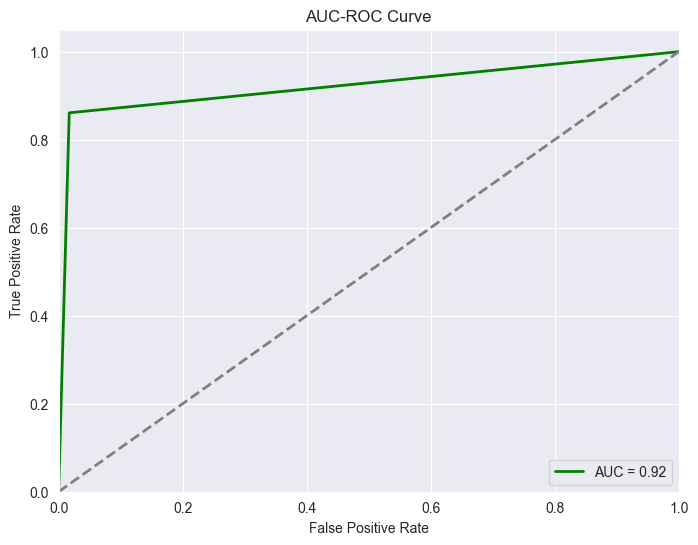

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Hitung nilai ROC Curve untuk model default
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, y_pred_proba_tuned[:, 1])
roc_auc_default = roc_auc_score(y_test, y_pred_proba_tuned[:, 1])

# Plot AUC-ROC Grafik
plt.figure(figsize=(8, 6))
plt.plot(fpr_default, tpr_default, color='green', lw=2, label=f'AUC = {roc_auc_default:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc="lower right")
plt.show()


**Result** :
The constructed model yields a performance with an `AUC (Area Under the Curve) of 0.92`. In the realm of credit risk modeling, an AUC above 0.7 is generally considered a strong indicator of performance excellence. This high AUC underscores the model's effectiveness in distinguishing between creditworthy and non-creditworthy applicants.
